# Overlay texts on images

After labeling elements in an image, one may want to see some text over each element describing, for example, its area, or simply the label number of that element. One way to do that is using the [matplotlib axes annotate function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html).

Previous related topics:

 * [Label images](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20_image_segmentation/09_connected_component_labeling.html)
 * [Quantitative image analysis](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/22_feature_extraction/quantitative_measurements.html)

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import measure
import pyclesperanto_prototype as cle

We first open an image and label objects in it.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
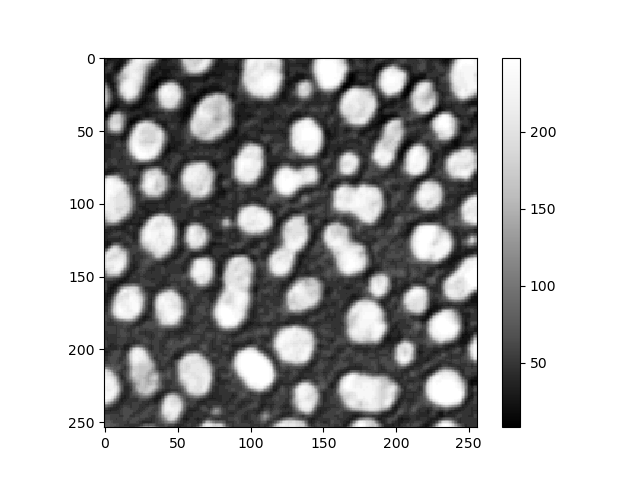
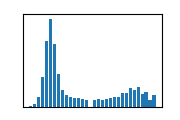

In [2]:
# Load data
blobs = imread('../../data/blobs.tif')
cle.asarray(blobs)

cl.OCLArray([[ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
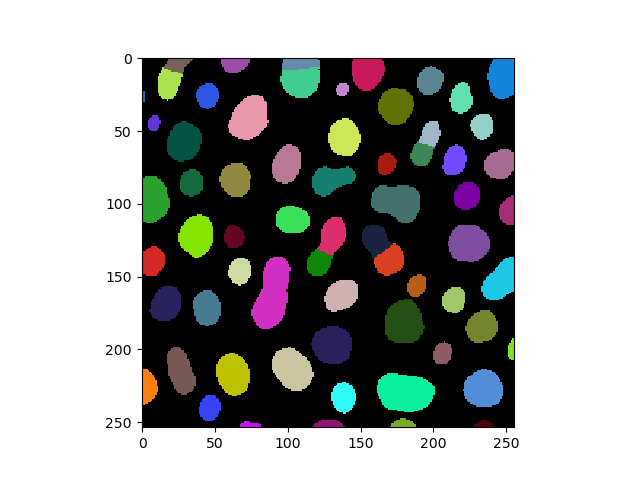

In [3]:
labeled_blobs = cle.voronoi_otsu_labeling(blobs, spot_sigma=3.5)
labeled_blobs

Then, we analyze the labeled elements and get their properties.

In [4]:
# Analyse objects
regionprops = measure.regionprops(labeled_blobs)

Finally, we use the `axs.annotate()` function with the following arguments:
 * `text`: the string to be displayed;
 * `xy`: the coordinates to plot the text;
 * `fontsize`: the size of the text;
 * `color`: the color of the text;

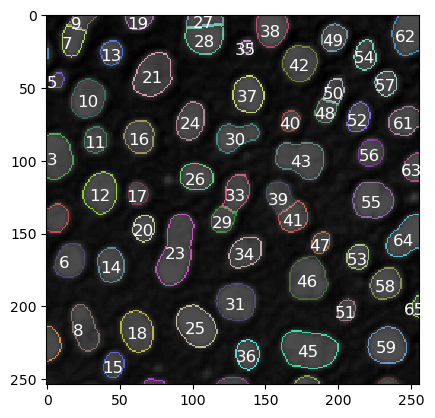

In [5]:
# Visualization
fig, axs = plt.subplots(1, 1)
cle.imshow(blobs, continue_drawing=True, plot=axs)
cle.imshow(cle.reduce_labels_to_label_edges(labeled_blobs), labels=True, plot=axs, continue_drawing=True, alpha=0.7)

# Plot label number over each element (iterate over each element)
for element in regionprops:
    # Get element centroid (x, y)
    element_centroid = (element.centroid[1]-8, element.centroid[0]+5)
    
    # Get element label and convert it to string
    element_label = str(element.label)
    
    # Plot label number at the coordinates of that element centroid
    axs.annotate(text = element_label, xy = element_centroid, fontsize = 12, color = 'white')

As mentioned before, we can write quantitative measurements on top of each element, like its area.

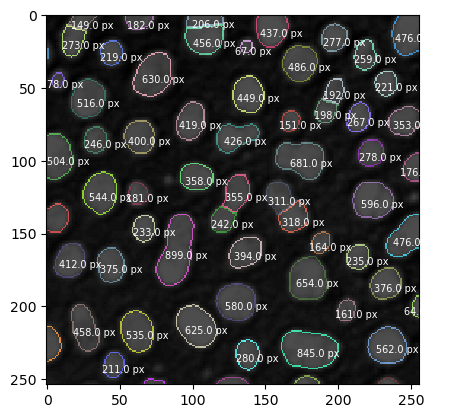

In [6]:
# Visualization
fig, axs = plt.subplots(1, 1)
cle.imshow(blobs, continue_drawing=True, plot=axs)
cle.imshow(cle.reduce_labels_to_label_edges(labeled_blobs), labels=True, plot=axs, continue_drawing=True, alpha=0.7)

# Plot label number over each element (iterate over each element)
for element in regionprops:
    # Get element centroid (x, y)
    element_centroid = (element.centroid[1]-8, element.centroid[0]+5)
    
    # Get element label and convert it to string
    element_area = str(element.area)
    
    # Plot label number at the coordinates of that element centroid
    axs.annotate(text = str(element_area) + " px", xy = element_centroid, fontsize = 7, color = 'white')